# Libraries

In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error


In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

# INPUTING EXPERIMENTAL and THEORETICAL

In [3]:
def obindingE(z,n):  #Oringinal Binding Energy Function
    a=z+n
    p1=  15.76   *(a)
    p2=  -17.81  *(a**(2./3.))
    p3=  -0.711  * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(z%2 ==0 and n%2==0):
        #print("even-even")
        p5=34.*(a**(-3./4.))
        
    elif(z%2 ==1 and n%2==1): 
        p5=-34.*(a**(-3./4.))
        #print("odd-odd")
    else: 
        p5=0
        #print("even-odd")
        
    be=p1+p2+p3+p4+p5
    return be

In [4]:
def nbindingE(Z,N):  #New Binding Energy Function
    A=Z+N
    a_v  =15.422
    a_s  =16.831
    a_c  =0.686
    a_a  =26.002
    a_as =-18.711
    a_p  = 11.199
    
    if((Z%2 ==0) and (N%2==0)):
        #print("even-even")
        n=1

    elif((Z%2 !=0) and (N%2!=0)):
        n=-1
        #print("odd-odd")
    else:
        n=0
        #print("even-odd")
    
    p_1 = a_v * A
    
    p_2 = a_s * (A**(2/3))

    p_3 = a_c * ( (Z**2)/(A**(1/3)) )
    
    p_4 = a_a + a_as/(A**(1/3))
    
    p_5 = ((A-(2*Z))**2)/A
    
    p_6 = a_p*n/(A**(1/2))
    
    
    
    B= p_1 -p_2 -p_3 -p_4 * p_5 -p_6
    
    return B
    
  

In [5]:
def ki(exp,the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for i in range(0, len(exp)):
        ki_2=ki_2+(exp[i]-the[i])**2
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp)))

In [6]:
#END OF DATA INPUT
#SKMS_all_nuclei-new.dat
#SKP_all_nuclei.dat
#SLY4_all_nuclei-new.dat

#SV-MIN_all_nuclei-new.dat
#UNEDF0_all_nuclei-new.dat
#UNEDF1_all_nuclei-new.dat

#6 Different theoretical Models


names=["SKMS_all_nuclei-new.dat", 
       "SKP_all_nuclei.dat",
       "SLY4_all_nuclei-new.dat", 
       "SV-MIN_all_nuclei-new.dat", 
       "UNEDF0_all_nuclei-new.dat", 
       "UNEDF1_all_nuclei-new.dat"]

#Experimental: skip_header=350, skip_footer=3433-2953
skip_H=[347,  304,  287,  316,  321,  310    ]
#skip_H =[0,    0,    0,    0,    0,    0  ]

top_F=[ 8700, 7478, 7264, 7924, 8300, 8324   ]
#top_F =[0,    0,    0,    0,    0,    0  ]
#skip_F=[0,    0,    0,    0,    0,    0  ]
skip_F=[5606, 4977, 4806, 5176, 5412, 5323   ]

Z_the    =[[],[],[],[],[],[]]
N_the    =[[],[],[],[],[],[]]
A_the    =[[],[],[],[],[],[]]

y_the    =[[],[],[],[],[],[]]
y_the_d  =[{},{},{},{},{},{}]

Q_the    =[[],[],[],[],[],[]]
Q_the_d  =[{},{},{},{},{},{}]

S_p_the  =[[],[],[],[],[],[]]
S_p_the_d=[{},{},{},{},{},{}]

S_2p_the    =[[],[],[],[],[],[]]
S_2p_the_d  =[{},{},{},{},{},{}]


S_n_the    =[[],[],[],[],[],[]]
S_n_the_d  =[{},{},{},{},{},{}]


S_2n_the   =[[],[],[],[],[],[]]
S_2n_the_d =[{},{},{},{},{},{}]

X_the      =[[],[],[],[],[],[]]

ZN_the    =[[],[],[],[],[],[]]
ZN_the_d  =[{},{},{},{},{},{}]
X_the    =[[],[],[],[],[],[]]

for i in range(0,6):
    Z_the [i]   = np.genfromtxt(names[i],usecols=1, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of protons
    N_the [i]   = np.genfromtxt(names[i],usecols=2, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i])) #Number of neutrons
    A_the [i]   = N_the[i]+Z_the[i]                     

    y_the [i]   = -np.genfromtxt(names[i],usecols=4, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(y_the[i])):
        y_the_d[i][Z_the[i][j],N_the[i][j]]=y_the[i][j]
    
    
    Q_the [i]   = -np.genfromtxt(names[i],usecols=9, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(Q_the[i])):
        Q_the_d[i][Z_the[i][j],N_the[i][j]]=Q_the[i][j]
    
    
    S_p_the  [i]= -np.genfromtxt(names[i],usecols=5, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_p_the[i])):
        S_p_the_d[i][Z_the[i][j],N_the[i][j]]=S_p_the[i][j]
    
    
    S_2p_the [i]= -np.genfromtxt(names[i],usecols=6, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2p_the[i])):
        S_2p_the_d[i][Z_the[i][j],N_the[i][j]]=S_2p_the[i][j]
    
    
    S_n_the [i] = -np.genfromtxt(names[i],usecols=7, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_n_the[i])):
        S_n_the_d[i][Z_the[i][j],N_the[i][j]]=S_n_the[i][j]
    
    
    S_2n_the[i] = -np.genfromtxt(names[i],usecols=8, skip_header=skip_H[i], skip_footer=(top_F[i]-skip_F[i]))
    for j in range(0,len(S_2n_the[i])):
        S_2n_the_d[i][Z_the[i][j],N_the[i][j]]=S_2n_the[i][j]
    
    ZN_the[i]= np.transpose(np.stack( (Z_the[i],N_the[i]) ))
    
    for j in range(0,len(ZN_the[i])):
        ZN_the_d[i][Z_the[i][j], N_the[i][j]]  =ZN_the[i][j]
    
    X_the[i]= np.transpose(np.stack(  (Z_the[i],N_the[i],  A_the[i],  y_the[i],  S_p_the[i],  S_n_the[i],  S_2p_the[i],  S_2n_the[i]) ))
    




In [7]:
exp_h=350
exp_f=3433-3046

N_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=exp_h, skip_footer=exp_f)
Z_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=exp_h, skip_footer=exp_f)
A_exp    = N_exp+Z_exp                                                        #Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y_exp    = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=exp_h, skip_footer=exp_f)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=exp_h, skip_footer=exp_f)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=exp_h, skip_footer=exp_f)

S_n_exp  =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=exp_h, skip_footer=exp_f)
S_2n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=exp_h, skip_footer=exp_f)


ZN_exp   = np.transpose(np.stack((Z_exp, N_exp)))
X_exp    = np.transpose(np.stack((Z_exp, N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))

y_exp_d={}
S_n_exp_d={}
S_2n_exp_d={}
S_p_exp_d={}
S_2p_exp_d={}



for i in range(0,len(N_exp)):
    y_exp_d[     Z_exp[i],   N_exp[i]]=  y_exp[i]
    
    S_n_exp_d[   Z_exp[i],   N_exp[i]]=  S_n_exp[i]
    S_2n_exp_d[  Z_exp[i],   N_exp[i]]=  S_2n_exp[i]
    
    S_p_exp_d[   Z_exp[i],   N_exp[i]]=  S_p_exp[i]
    S_2p_exp_d[  Z_exp[i],   N_exp[i]]=  S_2p_exp[i]
    

y_mat_the         =[[],[],[],[],[],[]]
y_mat_exp         =[[],[],[],[],[],[]]    
ZN_y_mat          =[[],[],[],[],[],[]]

S_p_mat_the       =[[],[],[],[],[],[]]
S_p_mat_exp       =[[],[],[],[],[],[]]
ZN_S_p_mat        =[[],[],[],[],[],[]]

S_2p_mat_the      =[[],[],[],[],[],[]]
S_2p_mat_exp      =[[],[],[],[],[],[]]
ZN_S_2p_mat       =[[],[],[],[],[],[]]

S_n_mat_the       =[[],[],[],[],[],[]]
S_n_mat_exp       =[[],[],[],[],[],[]]
ZN_S_n_mat        =[[],[],[],[],[],[]]

S_2n_mat_the      =[[],[],[],[],[],[]]
S_2n_mat_exp      =[[],[],[],[],[],[]]
ZN_S_2n_mat       =[[],[],[],[],[],[]]

Q_mat_the         =[[],[],[],[],[],[]]
ZN_Q_mat          =[[],[],[],[],[],[]]
X_mat             =[[],[],[],[],[],[]]
for i in range(0,6):
    for ZN_exp_i in ZN_exp:
        
        try:
            y_mat_the[i].append(y_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            y_mat_exp[i].append(y_exp_d[ZN_exp_i[0],ZN_exp_i[1]])
            ZN_y_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]]) 
        except KeyError:
            continue
        
        try:
            S_p_mat_the[i].append(S_p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_p_mat_exp[i].append(S_p_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_p_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_2p_mat_the[i].append(S_2p_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_2p_mat_exp[i].append(S_2p_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_2p_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_n_mat_the[i].append(S_n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_n_mat_exp[i].append(S_n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_n_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
        
        try:
            S_2n_mat_the[i].append(S_2n_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            S_2n_mat_exp[i].append(S_2n_exp_d[ZN_exp_i[0],ZN_exp_i[1]])  
            ZN_S_2n_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue
       
        try:
            Q_mat_the[i].append(Q_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
            ZN_Q_mat[i].append(ZN_the_d[i][ZN_exp_i[0],ZN_exp_i[1]])
        except KeyError:
            continue

for i in range(0,6):
    ZN_y_mat[i]=np.transpose(ZN_y_mat[i])
    ZN_S_p_mat[i]=np.transpose(ZN_S_p_mat[i])
    ZN_S_2p_mat[i]=np.transpose(ZN_S_2p_mat[i])
    ZN_S_n_mat[i]=np.transpose(ZN_S_n_mat[i])
    ZN_S_2n_mat[i]=np.transpose(ZN_S_2n_mat[i])
    ZN_Q_mat[i]=np.transpose(ZN_Q_mat[i])

    

for i in range(0,6):
    X_mat[i]=np.transpose(np.stack((y_mat_the[i], y_mat_exp[i], 
                                    ZN_y_mat[i][0], ZN_y_mat[i][1],
                                    
                                    S_p_mat_the[i], S_p_mat_exp[i],  
                                    ZN_S_p_mat[i][0], ZN_S_p_mat[i][1],
                                    
                                    S_2p_mat_the[i], S_2p_mat_exp[i],   
                                    ZN_S_2p_mat[i][0], ZN_S_2p_mat[i][1],
                                    
                                    S_n_mat_the[i], S_n_mat_exp[i],  
                                    ZN_S_n_mat[i][0], ZN_S_n_mat[i][1],     
                                    
                                    S_2n_mat_the[i], S_2n_mat_exp[i], 
                                    ZN_S_2n_mat[i][0], ZN_S_2n_mat[i][1],
                                    
                                    Q_mat_the[i],
                                    ZN_Q_mat[i][0], ZN_Q_mat[i][1], ) ) )      
  





ZN_LDM=[]
y_LDM=[]
y_LDM_d={}
#for Z in range(1,121):
#    for N in range(1,301):
for ZN_exp_i in ZN_exp:
    ZN_LDM.append((ZN_exp_i[0],ZN_exp_i[1]))
    y_LDM.append(nbindingE(ZN_exp_i[0],ZN_exp_i[1]))
    y_LDM_d[ZN_exp_i[0],ZN_exp_i[1]]=nbindingE(ZN_exp_i[0],ZN_exp_i[1])

        
    
for i in range(0,6):
    print(names[i])
    y_train, y_test = train_test_split( np.transpose(np.stack((y_mat_exp[i], y_mat_the[i]))), test_size =0.25)#, random_state=42 )
    y_train=np.transpose(y_train)
    y_test=np.transpose(y_test)

    print("trained:   ki=",ki(y_train[0],y_train[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_train[0],y_train[1])))
    print("tested:    ki=",ki(y_test[0],y_test[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_test[0],y_test[1])))
    print("all: i ",i, " ki=", ki(y_mat_exp[i], y_mat_the[i])," mean squared: ", np.sqrt(mean_squared_error(y_mat_exp[i],y_mat_the[i])) )
    print()
    
y_LDM_exp=np.transpose(np.stack((y_LDM, y_exp)))
y_train, y_test = train_test_split( y_LDM_exp, test_size =0.25)#, random_state=42 )
y_train=np.transpose(y_train)
y_test=np.transpose(y_test)


print('LDM')
print("trained: ki=",ki(y_train[0],y_train[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_train[1],y_train[0])))
print("tested:  ki=",ki(y_test[0],y_test[1]), "mean Squared: ", np.sqrt(mean_squared_error(y_test[1],y_test[0])))
print("all:   ki=",ki(y_exp, y_LDM), "mean squared: ", np.sqrt(mean_squared_error(y_LDM, y_exp)))

SKMS_all_nuclei-new.dat
trained:   ki= 6.3601048436771475 mean Squared:  6.360104843677144
tested:    ki= 6.501202694520612 mean Squared:  6.501202694520612
all: i  0  ki= 6.395698570629776  mean squared:  6.3956985706297775

SKP_all_nuclei.dat
trained:   ki= 2.8957238437436787 mean Squared:  2.8957238437436765
tested:    ki= 2.9610352130224094 mean Squared:  2.96103521302241
all: i  1  ki= 2.912195286502078  mean squared:  2.912195286502078

SLY4_all_nuclei-new.dat
trained:   ki= 4.557744422327897 mean Squared:  4.557744422327895
tested:    ki= 4.611216088279175 mean Squared:  4.611216088279177
all: i  2  ki= 4.571176105719517  mean squared:  4.5711761057195135

SV-MIN_all_nuclei-new.dat
trained:   ki= 2.7691574674455617 mean Squared:  2.7691574674455612
tested:    ki= 2.761244967005095 mean Squared:  2.7612449670050943
all: i  3  ki= 2.7671814634361946  mean squared:  2.767181463436194

UNEDF0_all_nuclei-new.dat
trained:   ki= 1.4549636226962068 mean Squared:  1.454963622696208
teste

In [8]:
y_nomat_the         =[[],[],[],[],[],[]]
ZN_y_nomat          =[[],[],[],[],[],[]]


for i in range(0,6):
    for ZN_the_i in ZN_the[i]:    
        try:
            test=y_exp_d[ZN_the_i[0],ZN_the_i[1]]
            
        except KeyError:
            try:
                y_nomat_the[i].append(y_the_d[i][ZN_the_i[0],ZN_the_i[1]])
                ZN_y_nomat[i].append(ZN_the_i)
            except KeyError:
                continue
        continue
            
for i in range(0,6):
    ZN_y_nomat[i]=np.transpose(ZN_y_nomat[i])
    


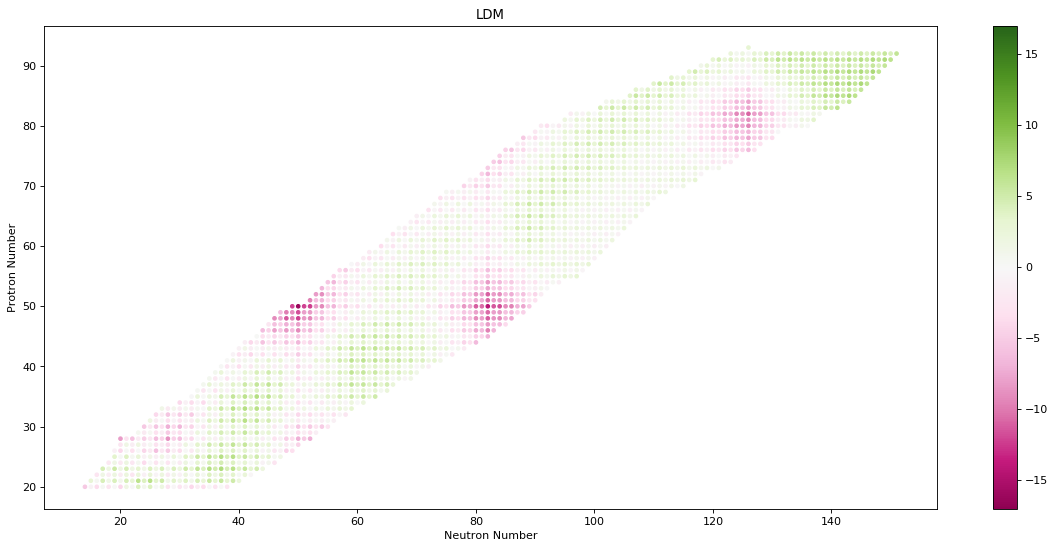

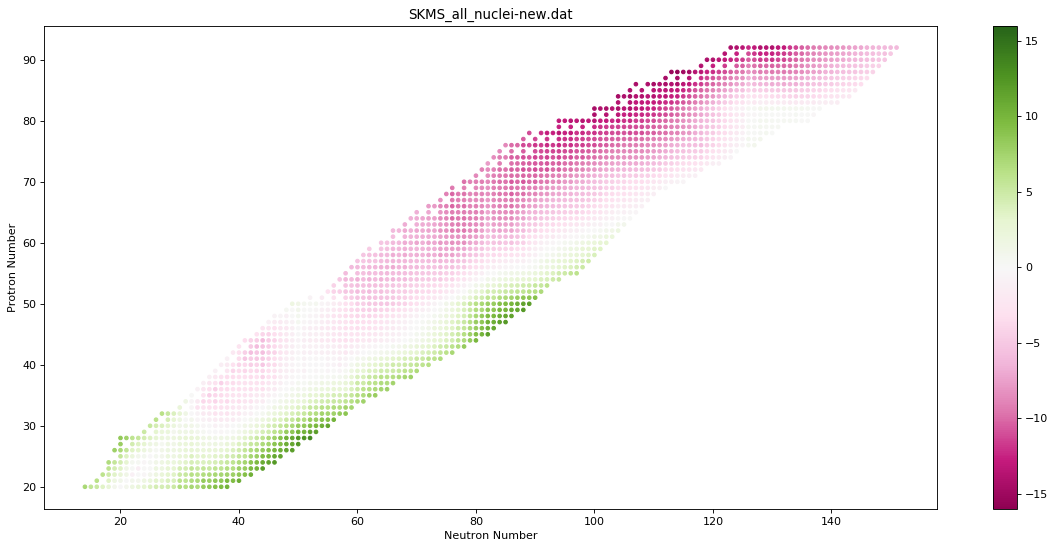

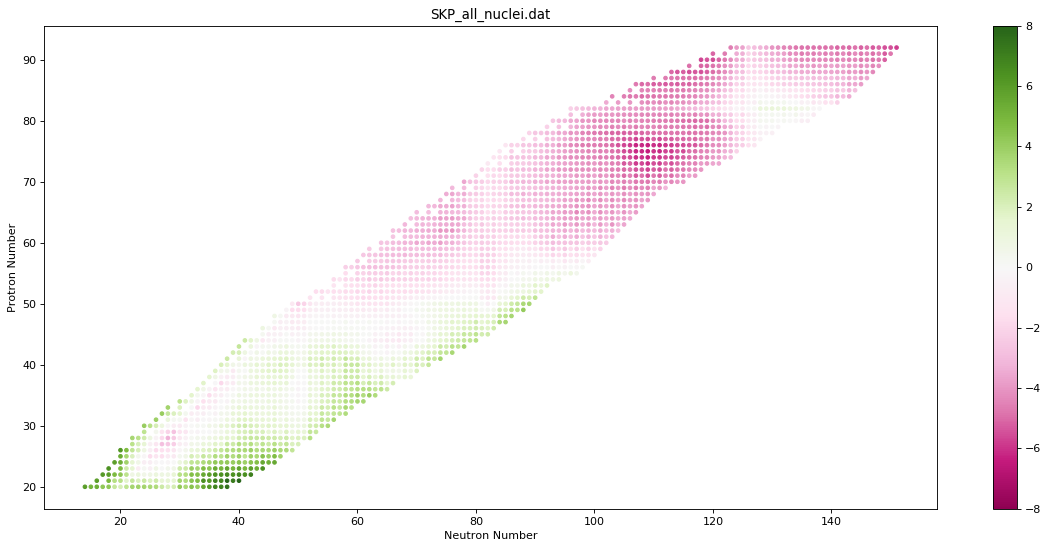

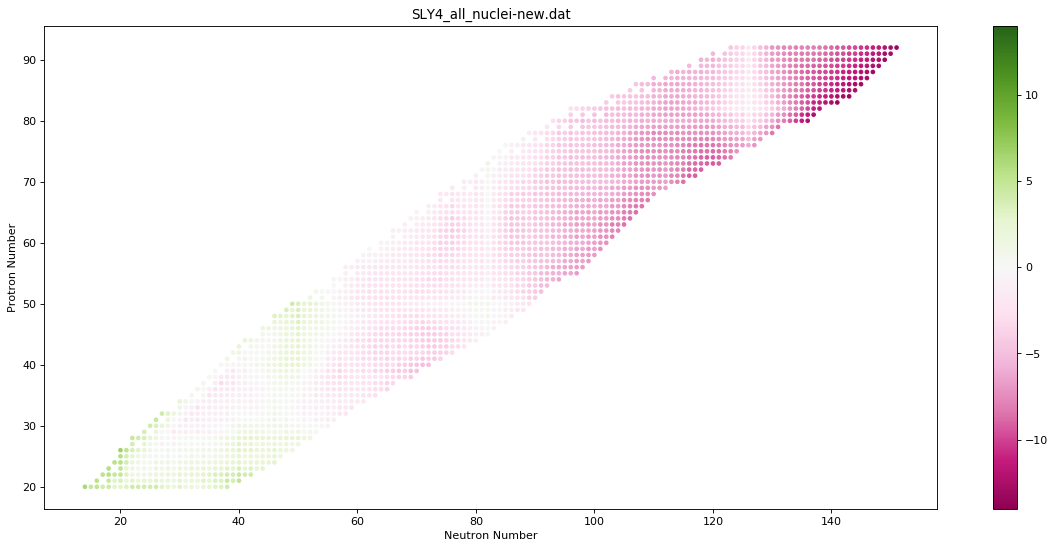

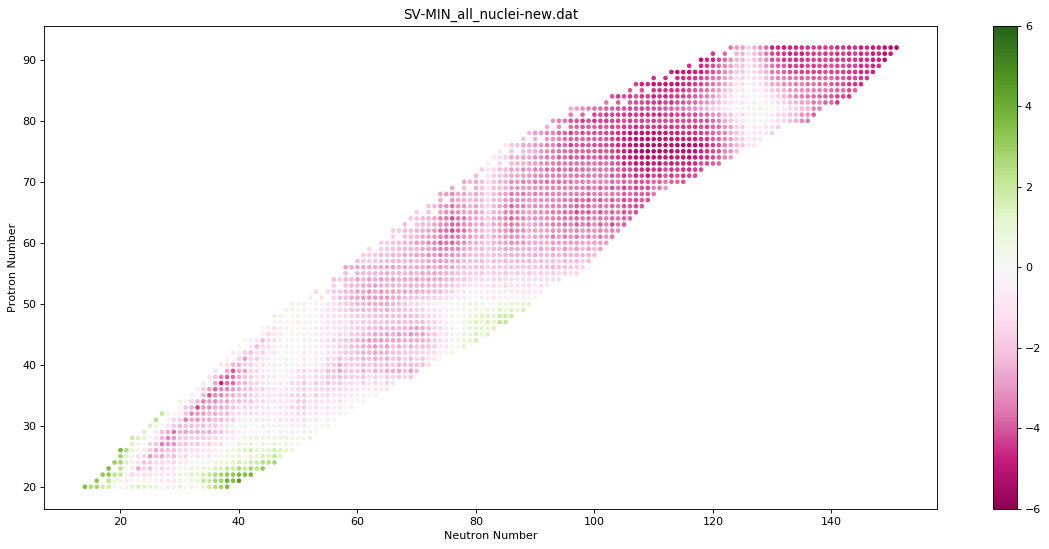

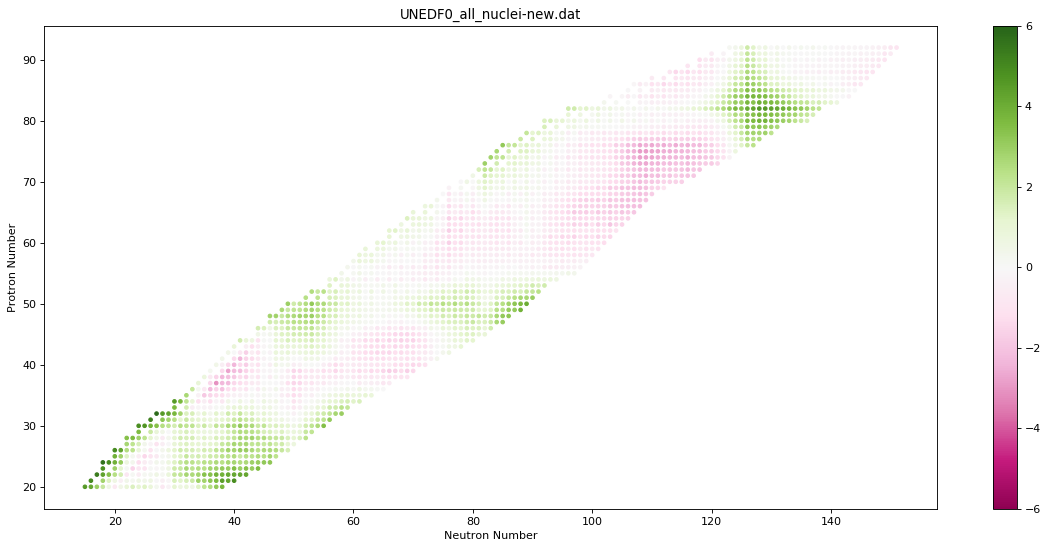

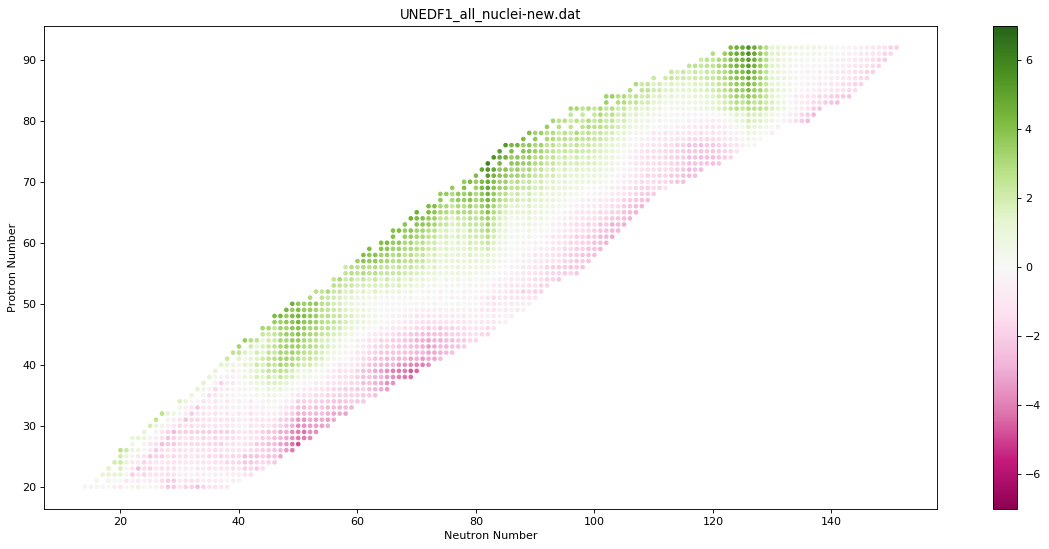

"\nfor i in range(0,6):\n    plt.title(names[i])\n    plt.plot(ZN_y_mat[i][1],ZN_y_mat[i][0], 'o', markersize=2, label='Match')\n    plt.plot(ZN_y_nomat[i][1],ZN_y_nomat[i][0], 'o', markersize=2, label='no Match')\n    plt.xlabel('Neutron Number')\n    plt.ylabel('Protron Number')\n    plt.legend()\n    plt.grid(True)\n    plt.show()\n\n"

In [9]:
y=[]
for j in range(0, len(y_exp)):
    y.append(y_LDM[j]-y_exp[j])
    
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(N_exp,Z_exp,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("LDM")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()

    
for i in range(0,6):
    y=[]
    for j in range(0, len(y_mat_the[i])):
        y.append(y_mat_the[i][j]-y_mat_exp[i][j])
    
    ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(ZN_y_mat[i][1],ZN_y_mat[i][0],c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
    plt.colorbar(sc)
    plt.title(names[i])
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.show()

"""
for i in range(0,6):
    plt.title(names[i])
    plt.plot(ZN_y_mat[i][1],ZN_y_mat[i][0], 'o', markersize=2, label='Match')
    plt.plot(ZN_y_nomat[i][1],ZN_y_nomat[i][0], 'o', markersize=2, label='no Match')
    plt.xlabel('Neutron Number')
    plt.ylabel('Protron Number')
    plt.legend()
    plt.grid(True)
    plt.show()

""" 


In [10]:
y=[]
for j in range(0, len(y_exp)):
    y.append(y_LDM[j]-y_exp[j])
    
sns.set_style('darkgrid')
sns.distplot(y, label='LDM')
plt.legend()


for i in range(0,6):
    y=[]
    for j in range(0, len(y_mat_the[i])):
        y.append(y_mat_the[i][j]-y_mat_exp[i][j])    
    sns.set_style('darkgrid')
    sns.distplot(y, label=names[i])
    plt.legend()
plt.show()    


y=[]
for j in range(0, len(y_exp)):
    y.append(y_LDM[j]-y_exp[j])
    
sns.set_style('darkgrid')
sns.distplot(y, label='LDM')
plt.legend()
plt.show()

for i in range(0,6):
    y=[]
    for j in range(0, len(y_mat_the[i])):
        y.append(y_mat_the[i][j]-y_mat_exp[i][j])    
    sns.set_style('darkgrid')
    sns.distplot(y, label=names[i])
    plt.legend()
    plt.show()
    
#rf with zn zq find delta 

SyntaxError: invalid syntax (<ipython-input-10-7957a9cde406>, line 38)

# Not Past this point
# Not Past this point
# Not Past this point
# Not Past this point
# Not Past this point
# Not Past this point
# Not Past this point
# Not Past this point


In [4]:
ZN_exp   = np.transpose(np.stack((Z_exp,N_exp)))
ZN_SKMS  = np.transpose(np.stack((Z_SKMS,N_SKMS)))


X_exp       = np.transpose(np.stack((Z_exp,   N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))
X_SKMS      = np.transpose(np.stack((Z_SKMS,  N_SKMS,  A_SKMS,  y_SKMS,  S_p_SKMS,  S_n_SKMS,  S_2p_SKMS,  S_2n_SKMS)))




y_exp_d     ={}

S_n_exp_d   ={}
S_2n_exp_d  ={}

S_p_exp_d   ={}
S_2p_exp_d  ={}


for i in range(0,len(N_exp)):
    y_exp_d[     Z_exp[i],   N_exp[i]]=  y_exp[i]
    
    S_n_exp_d[   Z_exp[i],   N_exp[i]]=  S_n_exp[i]
    S_2n_exp_d[  Z_exp[i],   N_exp[i]]=  S_2n_exp[i]
    
    S_p_exp_d[   Z_exp[i],   N_exp[i]]=  S_p_exp[i]
    S_2p_exp_d[  Z_exp[i],   N_exp[i]]=  S_2p_exp[i]

    

y_SKMS_d    ={}

S_n_SKMS_d  ={}
S_2n_SKMS_d ={}

S_p_SKMS_d  ={}
S_2p_SKMS_d ={}

Q_SKMS_d    ={}

for i in range(0,len(X_SKMS)):
    y_SKMS_d[    Z_SKMS[i], N_SKMS[i]]=y_SKMS[i]
    
    S_n_SKMS_d[  Z_SKMS[i], N_SKMS[i]]=S_n_SKMS[i]
    S_2n_SKMS_d[ Z_SKMS[i], N_SKMS[i]]=S_2n_SKMS[i]
    
    S_p_SKMS_d[  Z_SKMS[i], N_SKMS[i]]=S_p_SKMS[i]
    S_2p_SKMS_d[ Z_SKMS[i], N_SKMS[i]]=S_2p_SKMS[i]
    
    Q_SKMS_d[    Z_SKMS[i], N_SKMS[i]]=Q_SKMS[i]
    

# FINDING MATCHING DATA SET

In [5]:
Z_mat        =[]
N_mat        =[]

y_matexp     =[]
y_matexp_d   ={}

y_matSKMS    =[]
y_matSKMS_d  ={}

#Q_matexp     =[] #No Q exp values
#Q_matexp_d   ={}

Q_matSKMS    =[]
Q_matSKMS_d  ={}

diff_mat     =[]
diff_mat_d   ={}

Q_matexp     =[]
Q_matexp_d   ={}

Q_matSKMS    =[]
Q_matSKMS_d  ={}

#IMPROVING
for n in range(0, len(N_exp)+1):
    for z in range(0, len(Z_exp)+1):
        try:
            #Checking that there is y_exp AND y_SKMS
            
            test    =y_exp_d[z,n]
            test    =y_SKMS_d[z,n]
            
            diff_mat.append(y_exp_d[z,n]-y_SKMS_d[z,n])
            
            #Q_matexp.append(Q_exp_d[z,n]) No Experimental Q Value
            Q_matSKMS.append(Q_SKMS_d[z,n])
            
            N_mat.append(n)
            Z_mat.append(z)
            
            diff_mat_d[z,n]    =y_exp_d[z,n]-y_SKMS_d[z,n]
            
            y_matexp.append(    y_exp_d[z,n])
            y_matSKMS.append(   y_SKMS_d[z,n])
            
            y_matexp_d[z,n]    =y_exp_d[z,n]
            y_matSKMS_d[z,n]   =y_SKMS_d[z,n]
            
            #Q_matexp_d[z,n]    =Q_exp_d[z,n] No Experimental Q Value
            Q_matSKMS.append(Q_SKMS_d[z,n])
            #Q_matSKMS_d[z,n]   =Q_SKMS_d[z,n]
            
            
        except KeyError:
            continue

In [6]:
Z_mat        =[]
N_mat        =[]

y_matexp     =[]
y_matexp_d   ={}

y_matSKMS    =[]
y_matSKMS_d  ={}

#Q_matexp     =[] #No Q exp values
#Q_matexp_d   ={}

Q_matSKMS    =[]
Q_matSKMS_d  ={}

diff_mat     =[]
diff_mat_d   ={}

for ZN_i in ZN_exp:
    try:
        #Checking that there is y_exp AND y_SKMS
        test    =y_exp_d[ZN_i[0],ZN_i[1]]
        test    =y_SKMS_d[ZN_i[0],ZN_i[1]]
        
        
        diff_mat.append(y_exp_d[ZN_i[0],ZN_i[1]]-y_SKMS_d[ZN_i[0],ZN_i[1]])
        Z_mat.append(ZN_i[0])
        N_mat.append(ZN_i[1])

        y_matexp.append(y_exp_d[ ZN_i[0],ZN_i[1] ])
        y_matexp_d[ZN_i[0],ZN_i[1]]    =y_exp_d[ZN_i[0],ZN_i[1]]
        
        y_matSKMS.append(y_SKMS_d[ ZN_i[0],ZN_i[1] ])
        y_matSKMS_d[ZN_i[0],ZN_i[1]]   =y_SKMS_d[ZN_i[0],ZN_i[1]]
        
        
        Q_matSKMS.append(Q_SKMS_d[ZN_i[0],ZN_i[1]])
        Q_matSKMS_d[ZN_i[0],ZN_i[1]]   =Q_SKMS_d[ZN_i[0],ZN_i[1]]
    except KeyError:
        continue
            
            

# FINDING NO MATCH DATA SET

In [9]:
N_nomat=[]
Z_nomat=[]


y_nomatSKMS=[]
Q_nomatSKMS=[]

S_n_nomatSKMS=[]
S_p_nomatSKMS=[]

for ZN_i in ZN_SKMS:
    try:
        test=y_exp_d[ZN_i[0], ZN_i[1]]       #Testing that their is no experimental value for this nucleon
        
    except KeyError:        
        try:
            test=y_SKMS_d[ZN_i[0],ZN_i[1]]   #Testing that their is a theoretical value for this nucleon
                    
            Z_nomat.append(ZN_i[0])
            N_nomat.append(ZN_i[1])
                    
            y_nomatSKMS.append(y_SKMS_d[ZN_i[0],ZN_i[1]])
            Q_nomatSKMS.append(Q_SKMS_d[ZN_i[0],ZN_i[1]])
                    
            S_n_nomatSKMS.append(S_n_SKMS_d[ZN_i[0],ZN_i[1]])
            S_p_nomatSKMS.append(S_p_SKMS_d[ZN_i[0],ZN_i[1]])
            
        except KeyError:
            continue
    continue
                
                    
ZN_mat     =np.transpose(np.stack((Z_mat,N_mat)))                         
ZN_nomat   =np.transpose(np.stack((Z_nomat,N_nomat)))     
                    
print(np.shape(ZN_mat))
print(np.shape(ZN_nomat))
print(ZN_mat[0])
print(ZN_nomat[0])

(2968, 2)
(5385, 2)
[20. 14.]
[20. 39.]


# Checking Shapes

In [99]:
               
print("n exp shape", np.shape(N_exp))
print("z exp shape", np.shape(Z_exp))
print("y exp shape", np.shape(y_exp), "\n")

print("n SKMS shape", np.shape(N_SKMS))
print("z SKMS shape", np.shape(Z_SKMS))
print("y SKMS shape", np.shape(y_SKMS))
print("Q SKMS shape", np.shape(Q_SKMS), "\n")


print("n mat shape", np.shape(N_mat))
print("z mat shape", np.shape(Z_mat))
print("y mat exp  shape", np.shape(y_matexp))
print("y mat SKMS shape", np.shape(y_matSKMS))
print("Q mat SKMS shape", np.shape(Q_matSKMS), "\n")



print("n nomat shape", np.shape(N_nomat))
print("z nomat shape", np.shape(Z_nomat))
print("y nomat SKMS shape", np.shape(y_nomatSKMS))
print("Q_nomatSKMS", np.shape(Q_nomatSKMS), "\n")


n exp shape (3083,)
z exp shape (3083,)
y exp shape (3083,) 

n SKMS shape (8353,)
z SKMS shape (8353,)
y SKMS shape (8353,)
Q SKMS shape (8353,) 

n mat shape (2968,)
z mat shape (2968,)
y mat exp  shape (2968,)
y mat SKMS shape (2968,)
Q mat SKMS shape (2968,) 

n nomat shape (5385,)
z nomat shape (5385,)
y nomat SKMS shape (5385,)
Q_nomatSKMS (5385,) 



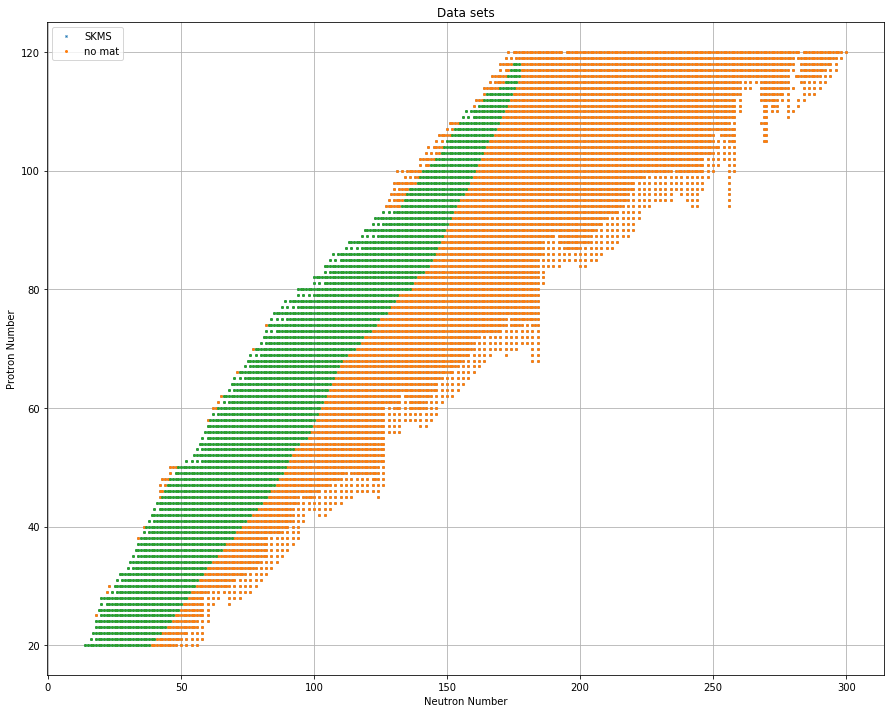

In [19]:
plt.title('Data sets')
#plt.plot(N_exp, Z_exp,  'x', markersize=2, label='exp')
#plt.plot(N_SKMS, Z_SKMS, 'x', markersize=2, label='SKMS')
#plt.plot(N_nomat,  Z_nomat, 'o', markersize=2, label='no mat')
#plt.plot(N_mat,Z_mat,'o', markersize=2)
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()

         

# random forest feature sets

functions:
rf application:  
    
    rf fitting         func: to fit matching experimental and theoretical data. Calls match data function, ki_2 function          
    match data         func: Finds where experimental and theoretical data matches.     
      
    non match data     func: Finds all nucleons with theoretical values but not experimental    
    
    rf.predict train   func: predict ml component for train  
    
    rf.predict test    func: predict ml component for test  
    
    rf.predict all mat func: predict ml component for all matching data set  
    
    rf.predict non mat func: predict ml component for all non matching data set  
    
    ki_2               func: Finds the ki square of the the training, testing, matching data sets with and without ml component.
    
    
    

variance examination:
    Variance func: call rf_fitting
    call rf fitting func with 
mean/median/std func: find the mean/median/std of the matching and the non matching data set Seperatly.



## ZN

In [34]:
ZN_mat=np.transpose(np.stack((Z_mat,N_mat)))
ZN_mat=np.array(ZN_mat)

ZN_nomat=np.transpose(np.stack((Z_nomat,N_nomat)))
ZN_nomat=np.array(ZN_nomat)

ZN_SKMS=np.transpose(np.stack((Z_SKMS,N_SKMS)))
ZN_SKMS=np.array(ZN_SKMS)


print("ZN_mat shape:", np.shape(ZN_mat))
print("diff mat:", np.shape(diff_mat), "\n")


print("ZN_nomat shape:", np.shape(ZN_nomat))
print("ZN_SKMS  shape:", np.shape(ZN_SKMS), "\n")

ZN_train, ZN_test, y_ZN_train, y_ZN_test = train_test_split(ZN_mat, diff_mat, test_size =0.25, random_state=42 )

print("ZN_train", np.shape(ZN_train))
print("ZN_test", np.shape(ZN_test  ))


ZN_mat shape: (2968, 2)
diff mat: (2968,) 

ZN_nomat shape: (5385, 2)
ZN_SKMS  shape: (8353, 2) 

ZN_train (2226, 2)
ZN_test (742, 2)


## ZQ

In [104]:
print(np.shape(Z_mat))
print(np.shape(Q_matSKMS))


ZQ_mat=np.transpose(np.stack((Z_mat,Q_matSKMS)))
ZQ_mat=np.array(ZQ_mat)

ZQ_nomat=np.transpose(np.stack((Z_nomat,Q_nomatSKMS)))
ZQ_nomat=np.array(ZQ_nomat)

ZQ_SKMS=np.transpose(np.stack((Z_SKMS,Q_SKMS)))
ZQ_SKMS=np.array(ZQ_SKMS)

print("ZQ_mat shape:", np.shape(ZQ_mat))
print("diff mat:", np.shape(diff_mat), "\n")


print("ZQ_nomat shape:", np.shape(ZQ_nomat))
print("ZQ_SKMS  shape:", np.shape(ZQ_SKMS), "\n")

ZQ_train, ZQ_test, y_ZQ_train, y_ZQ_test = train_test_split(ZQ_mat, diff_mat, test_size =0.25, random_state=42 )

print("ZQ_train", np.shape(ZQ_train))
print("ZQ_test", np.shape(ZQ_test  ))


(2968,)
(2968,)
ZQ_mat shape: (2968, 2)
diff mat: (2968,) 

ZQ_nomat shape: (5385, 2)
ZQ_SKMS  shape: (8353, 2) 

ZQ_train (2226, 2)
ZQ_test (742, 2)


## NQ

In [105]:
print(np.shape(N_mat))
print(np.shape(Q_matSKMS))


NQ_mat=np.transpose(np.stack((N_mat,Q_matSKMS)))
NQ_mat=np.array(NQ_mat)

NQ_nomat=np.transpose(np.stack((N_nomat,Q_nomatSKMS)))
NQ_nomat=np.array(NQ_nomat)

NQ_SKMS=np.transpose(np.stack((N_SKMS,Q_SKMS)))
NQ_SKMS=np.array(NQ_SKMS)

print("NQ_mat shape:", np.shape(NQ_mat))
print("diff mat:", np.shape(diff_mat), "\n")


print("NQ_nomat shape:", np.shape(NQ_nomat))
print("NQ_SKMS  shape:", np.shape(NQ_SKMS), "\n")

NQ_train, NQ_test, y_NQ_train, y_NQ_test = train_test_split(NQ_mat, diff_mat, test_size =0.25, random_state=42 )

print("NQ_train", np.shape(NQ_train))
print("NQ_test", np.shape(NQ_test  ))


(2968,)
(2968,)
NQ_mat shape: (2968, 2)
diff mat: (2968,) 

NQ_nomat shape: (5385, 2)
NQ_SKMS  shape: (8353, 2) 

NQ_train (2226, 2)
NQ_test (742, 2)


## NZQ